<a href="https://colab.research.google.com/github/PotatoSpudowski/Graph_convolution_basics/blob/master/Embed_molecules_using_GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("Gpu name: "+ gpu.name +"| GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=8e2823a148870e27da0633060716680eb1d60c27f4e9af675bc6bb7f6917e6f3
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.7 GB  | Proc size: 159.2 MB
Gpu name: Tesla P100-PCIE-16GB| GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [2]:
!pip install torch-scatter==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.4.0.html
!pip install torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.4.0.html
!pip install torch-cluster==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.4.0.html
!pip install torch-spline-conv==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.4.0.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.4.0.html
     |████████████████████████████████| 10.6MB 1.6MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.4.0.html
     |████████████████████████████████| 15.2MB 2.0MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.4.0.html
     |████████████████████████████████| 14.5MB 972kB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.4.0.html
     |████████████████████████████████| 5.1MB 690kB/s 
     |████████████████████████████████| 133kB 4.7MB/s 
     |████████████████████████████████| 348kB 15.2MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.4.3-cp36-none-any.whl size=234873 sha256=fc2fa6a52e4755bc84d941367e276d487771eddd60ea02a3779b32534e36ec2c
  Stored in directory: /root/.cache/pip/wheels/e2/c1/09/8693feee3f97e440d68b09abfca8b4c1e97150ace350b5003f
Successfully built torch-geometric


In [3]:
!pip install annoy

     |████████████████████████████████| 645kB 4.8MB/s 
  Created wheel for annoy: filename=annoy-1.16.3-cp36-cp36m-linux_x86_64.whl size=297320 sha256=42d13022781867241db5653b517d056955dbb640f7101138b22e2edde42d826d
  Stored in directory: /root/.cache/pip/wheels/f3/01/54/6ef760fe9f9fc6ba8c19cebbe6358212b5f3b5b0195c0b813f
Successfully built annoy


In [4]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-04-12 02:17:16--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-04-12 02:17:16--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   157MB/s    in 0.5s    

2020-04-12 02:17:17 (157 MB/s) - ‘Miniconda3-latest-Linux

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [6]:
!git clone "https://github.com/PotatoSpudowski/Graph_convolution_basics.git"
%cd "Graph_convolution_basics"

Cloning into 'Graph_convolution_basics'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 3), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.
/content/Graph_convolution_basics


In [7]:
!wget 'https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf'
!wget 'https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf'

--2020-04-12 02:18:27--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.05s   

2020-04-12 02:18:28 (24.7 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]

--2020-04-12 02:18:30--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch.nn import BatchNorm1d
from torch.utils.data import Dataset
from torch_geometric.nn import GCNConv
from torch_geometric.nn import SplineConv
from torch_geometric.nn import ChebConv
from torch_geometric.nn import global_add_pool, global_mean_pool
from torch_geometric.data import DataLoader
from torch_scatter import scatter_mean
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from annoy import AnnoyIndex
from tqdm import tqdm

import mol2graph
 
plt.style.use("ggplot")
 
train_mols = [m for m in Chem.SDMolSupplier('solubility.train.sdf')]
test_mols = [m for m in Chem.SDMolSupplier('solubility.test.sdf')]
sol_cls_dict = {'(A) low':0, '(B) medium':1, '(C) high':2}

In [0]:
df = PandasTools.LoadSDF('solubility.train.sdf')

,ID,NAME,SOL,SOL_classification,smiles,ROMol
0,n-pentane,n-pentane,-3.18,(A) low,CCCCC,
1,cyclopentane,cyclopentane,-2.64,(B) medium,C1CCCC1,
2,n-hexane,n-hexane,-3.84,(A) low,CCCCCC,
3,2-methylpentane,2-methylpentane,-3.74,(A) low,CCCC(C)C,
4,"2,2-dimethylbutane","2,2-dimethylbutane",-3.55,(A) low,CCC(C)(C)C,
...,...,...,...,...,...,...
1020,Prednisolone-21-Trimethylacetate,Prednisolone-21-Trimethylacetate,-4.58,(A) low,O=C1C=C2CCC3C4CCC(O)(C(=O)COC(=O)C(C)(C)C)C4(C...,
1021,Glycocholic_Acid,Glycocholic_Acid,-5.15,(A) low,O=C(NCC(=O)O)CCC(C(C(C(C(C(C(C(C1)CC(O)C2)(C2)...,
1022,Rolitetracycline,Rolitetracycline,-1.42,(B) medium,c12C(=O)C3=C(O)C4(O)C(=O)C=C(O)C(N(C)C)C4CC3C(...,
1023,Hydrocortisone_Tebutate,Hydrocortisone_Tebutate,-5.51,(A) low,C1C(=O)C=C2CCC3C4CCC(O)(C(=O)COC(=O)CC(C)(C)C)...,

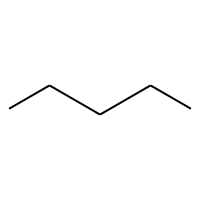
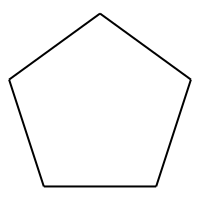
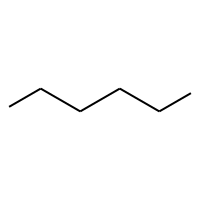
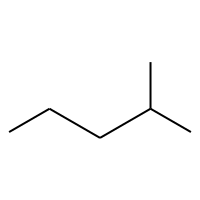
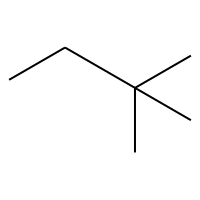
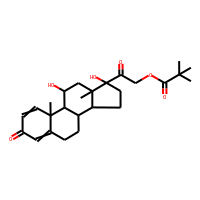
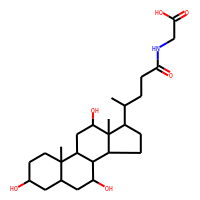
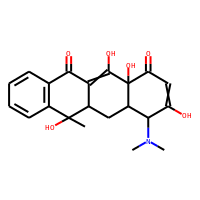
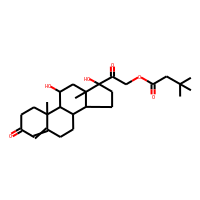
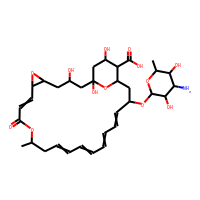

In [10]:
df

##Let us look at the data that will be given as an input to the model that we will be building.

In [11]:
print(df['NAME'][0])
print(df['smiles'][0])
vec = mol2graph.mol2vec(train_mols[0])
print(vec)
print(vec.x.shape)

n-pentane
CCCCC
Data(edge_attr=[8, 6], edge_index=[2, 8], x=[5, 75])
torch.Size([5, 75])


In [12]:
print(df['NAME'][3])
print(df['smiles'][3])
vec = mol2graph.mol2vec(train_mols[3])
print(vec)
print(vec.x.shape)

2-methylpentane
CCCC(C)C
Data(edge_attr=[10, 6], edge_index=[2, 10], x=[6, 75])
torch.Size([6, 75])


In [13]:
print(df['NAME'][76])
print(df['smiles'][76])
vec = mol2graph.mol2vec(train_mols[76])
print(vec)
print(vec.x.shape)

perylene
c(c(ccc1)ccc2)(c1c(c(c(cc3)ccc4)c45)c3)c25
Data(edge_attr=[48, 6], edge_index=[2, 48], x=[20, 75])
torch.Size([20, 75])


Vector x shape depends on the no of atoms present in the molecule but every molecule is one hot encoded to the same size in all the molecules.
That is 75.

##Building Dataloaders

In [0]:
train_X = [mol2graph.mol2vec(m) for m in train_mols]
for i, data in enumerate(train_X):
    y = sol_cls_dict[train_mols[i].GetProp('SOL_classification')]
    data.y = torch.tensor([y], dtype=torch.long)
 
test_X = [mol2graph.mol2vec(m) for m in test_mols]
for i, data in enumerate(test_X):
    y = sol_cls_dict[test_mols[i].GetProp('SOL_classification')]
    data.y = torch.tensor([y], dtype=torch.long)
train_loader = DataLoader(train_X, batch_size=64, shuffle=True, drop_last=True)
test_loader = DataLoader(test_X, batch_size=64, shuffle=True, drop_last=True)

##Building a Model

In [0]:
n_features = 75
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(n_features, 128, cached=False)
        self.bn1 = BatchNorm1d(128)
        self.conv2 = GCNConv(128, 64, cached=False)
        self.bn2 = BatchNorm1d(64)
        self.fc1 = Linear(64, 64)
        self.bn3 = BatchNorm1d(64)
        self.fc2 = Linear(64, 64)
        self.fc3 = Linear(64, 3)
         
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.bn1(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.bn2(x)
        x = global_add_pool(x, data.batch)
        x = F.relu(self.fc1(x))
        x = self.bn3(x)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x 

##Training

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
def train(epoch):
    model.train()
    loss_all = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, data.y)
        loss.backward()
        loss_all += loss.item() * data.num_graphs
        optimizer.step()
    return loss_all / len(train_X)
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        output = model(data)
        pred = output.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)
hist = {"loss":[], "acc":[], "test_acc":[]}
for epoch in range(1, 101):
    train_loss = train(epoch)
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    hist["loss"].append(train_loss)
    hist["acc"].append(train_acc)
    hist["test_acc"].append(test_acc)
    print(f'Epoch: {epoch}, Train loss: {train_loss:.3}, Train_acc: {train_acc:.3}, Test_acc: {test_acc:.3}')

Epoch: 1, Train loss: 0.856, Train_acc: 0.485, Test_acc: 0.482
Epoch: 2, Train loss: 0.663, Train_acc: 0.736, Test_acc: 0.747
Epoch: 3, Train loss: 0.556, Train_acc: 0.812, Test_acc: 0.794
Epoch: 4, Train loss: 0.497, Train_acc: 0.814, Test_acc: 0.79
Epoch: 5, Train loss: 0.475, Train_acc: 0.772, Test_acc: 0.732
Epoch: 6, Train loss: 0.393, Train_acc: 0.818, Test_acc: 0.786
Epoch: 7, Train loss: 0.401, Train_acc: 0.854, Test_acc: 0.774
Epoch: 8, Train loss: 0.379, Train_acc: 0.879, Test_acc: 0.794
Epoch: 9, Train loss: 0.408, Train_acc: 0.772, Test_acc: 0.751
Epoch: 10, Train loss: 0.379, Train_acc: 0.826, Test_acc: 0.778
Epoch: 11, Train loss: 0.354, Train_acc: 0.773, Test_acc: 0.743
Epoch: 12, Train loss: 0.366, Train_acc: 0.872, Test_acc: 0.794
Epoch: 13, Train loss: 0.397, Train_acc: 0.841, Test_acc: 0.77
Epoch: 14, Train loss: 0.332, Train_acc: 0.878, Test_acc: 0.817
Epoch: 15, Train loss: 0.355, Train_acc: 0.881, Test_acc: 0.833
Epoch: 16, Train loss: 0.327, Train_acc: 0.876, Tes

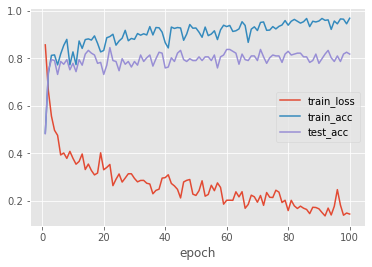

In [19]:
ax = plt.subplot(1,1,1)
ax.plot([e for e in range(1,101)], hist["loss"], label="train_loss")
ax.plot([e for e in range(1,101)], hist["acc"], label="train_acc")
ax.plot([e for e in range(1,101)], hist["test_acc"], label="test_acc")
plt.xlabel("epoch")
ax.legend()

##Build a feature extractor to generate embeddings for graphs

In [20]:
model

GCN(
  (conv1): GCNConv(75, 128)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GCNConv(128, 64)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)

In [0]:
class GCN_feature_extractor(torch.nn.Module):
    def __init__(self, inception, transform_input=False):
        super(GCN_feature_extractor, self).__init__()
        self.conv1 = GCNConv(n_features, 128, cached=False)
        self.bn1 = BatchNorm1d(128)
        self.conv2 = GCNConv(128, 64, cached=False)
        self.bn2 = BatchNorm1d(64)
        self.fc1 = Linear(64, 64)
        self.bn3 = BatchNorm1d(64)
        self.fc2 = Linear(64, 64)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.bn1(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.bn2(x)
        x = global_add_pool(x, data.batch)
        x = F.relu(self.fc1(x))
        x = self.bn3(x)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.2, training=self.training)
        
        return x 

In [0]:
model2 = GCN_feature_extractor(model)

In [43]:
model2

GCN_feature_extractor(
  (conv1): GCNConv(75, 128)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GCNConv(128, 64)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
)

In [0]:
def get_embeddings(test_loader):
    embeddings = []
    for data in train_loader:
        outputs = model2(data)
        for output in outputs:
            embeddings.append(output.detach().numpy())

    return embeddings

In [0]:
embeddings = get_embeddings(test_loader)

In [125]:
#printing embedding for first molecule
embeddings[0]

array([0.        , 0.        , 0.47219217, 0.        , 0.11149442,
       0.        , 0.74038494, 0.9845204 , 0.        , 0.        ,
       0.08521815, 0.37342384, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04067358, 0.        , 0.6070059 ,
       0.556885  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.320163  , 0.08434646, 0.        , 0.        ,
       0.06690157, 0.        , 0.        , 0.        , 0.        ,
       0.2877086 , 0.        , 0.38897985, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10599753, 0.        , 0.        , 0.16044496, 0.9298236 ,
       0.        , 0.4217041 , 0.        , 0.        , 0.2988984 ,
       0.        , 0.        , 0.        , 0.355279  , 0.08808471,
       0.        , 0.        , 0.81478685, 0.        ], dtype=float32)

In [0]:
def build_annoy_index(features, feature_size, no_of_trees):
    if type(features) != np.ndarray:
        features = np.asarray(features)
    annoy_index = AnnoyIndex(feature_size, metric='angular')
    for index, vector in tqdm(enumerate(features)):
        annoy_index.add_item(index, vector)
    annoy_index.build(no_of_trees)

    return annoy_index

In [90]:
annoy_index = build_annoy_index(embeddings, 64, 10000)

1024it [00:00, 78821.20it/s]


##Testing the similarity searcher

,ID,NAME,SOL,SOL_classification,smiles,ROMol
1,cyclopentane,cyclopentane,-2.64,(B) medium,C1CCCC1,

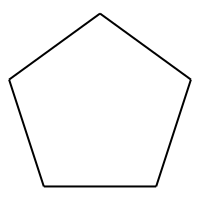

In [112]:
df.loc[[1]]

In [0]:
distances = annoy_index.get_nns_by_vector(embeddings[1], 4, include_distances=True)

In [121]:
distances

([1, 454, 199, 804],
 [0.0, 0.7308956384658813, 0.8001124858856201, 0.8143857717514038])

,ID,NAME,SOL,SOL_classification,smiles,ROMol
454,"N,N-diethylaniline","N,N-diethylaniline",-3.03,(A) low,c1ccccc1N(CC)CC,

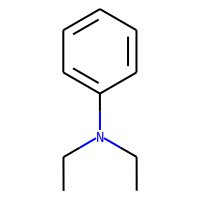

In [122]:
df.loc[[distances[0][1]]]

,ID,NAME,SOL,SOL_classification,smiles,ROMol
199,"2,3ﾴ,4,4ﾴ,5-PCB","2,3ﾴ,4,4ﾴ,5-PCB",-7.39,(A) low,c1cc(Cl)c(Cl)cc1c2c(Cl)cc(Cl)c(Cl)c2,

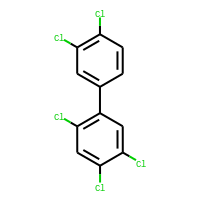

In [123]:
df.loc[[distances[0][2]]]

,ID,NAME,SOL,SOL_classification,smiles,ROMol
804,Phthalic_Anhydride,Phthalic_Anhydride,-1.39,(B) medium,O=C(OC(=O)c1cccc2)c12,

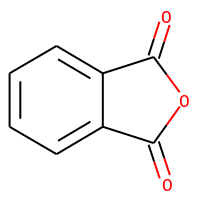

In [124]:
df.loc[[distances[0][3]]]